In [48]:
#%%sh
!pip install pandas

# Mount Google Drive
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [49]:
import os
os.listdir(os.path.join('gdrive', 'My Drive', 'BaBe AI Academy', 'Project'))

['test.json',
 'train.json',
 'test_result.json',
 'stop_words.txt',
 'train_spo.txt',
 'train_fun.txt',
 'test.txt',
 'test_result.txt',
 'train_ent.txt',
 'train_oth.txt',
 'Project: Video Title Classification.ipynb']

In [50]:
data_dir = os.path.join('gdrive', 'My Drive', 'BaBe AI Academy', 'Project')
fun_f = os.path.join(data_dir, 'train_fun.txt')
spo_f = os.path.join(data_dir, 'train_spo.txt')
ent_f = os.path.join(data_dir, 'train_ent.txt')
oth_f = os.path.join(data_dir, 'train_oth.txt')

# Read texts into list
def read_lines(filepath):
    with open(filepath) as fp:
        content = fp.readlines()
        content = [x.strip() for x in content]
    return content
  
 
fun = read_lines(fun_f)
sport = read_lines(spo_f)
entertainment = read_lines(ent_f)
other = read_lines(oth_f)

data = {'fun': fun, 'sport': sport, 'entertainment': entertainment, 'other': other}

print('data size: {}, {}, {}, {}'.format(len(fun), len(sport), len(entertainment), len(other)))

data size: 9157, 6382, 13203, 221420


In [0]:
import pandas as pd
# create a dataframe for all training texts, with their labels
def create_dataframe_with_label(fun, sport, entertainment, other):
  all = fun + sport + entertainment + other
  # make label
  label = []
  for _ in fun:
    label.append(1)
  for _ in sport:
    label.append(2)
  for _ in entertainment:
    label.append(3)
  for _ in other:
    label.append(4)
    
  # create a pandas dataframe using texts and labels
  trainDF = pd.DataFrame()
  trainDF['text'] = all
  trainDF['label'] = label
  return trainDF

In [52]:
data = create_dataframe_with_label(fun, sport, entertainment, other)
print(data.head(20))

                                                 text  label
0   """ antara kasian dan lucu ... barongsai nyung...      1
1   """ Gak Nahan Ngakak, Pas Liat Hasil Poto ..."...      1
2   """ Niana Lagi Tidur Dikerjain Hantu Sama Ranz...      1
3   """ Tidak sebut merek   Meme comic world "", "...      1
4   """# Lucu Essien ke Belanja ke Pasar Nyobain D...      1
5   """#1 Tonton sampai Habis! Dijamin Ngakak"", "...      1
6   """#1 Video Lucu Guru Bikin Ngakak, \""Bertann...      1
7   """#10 J&t Dikerjain Sama Yang Ulang Tahun"", ...      1
8   """#10 Video Lucu Bikin Ngakak (BATAL PUASA) K...      1
9   """#10 Video Lucu Bikin Ngakak Banget Terbaru ...      1
10  """#2 Momen Lucu Semua Orang Ketakutan Saat Na...      1
11  """#2 Tonton sampai Habis! Dijamin Ngakak"", "...      1
12  """#21 Kumpulan Kejadian Lucu dan Unik di Jala...      1
13  """#9 Eta Terangkan Lah Versi Spongebob Kocak"...      1
14  """#Diana Nduts - ENYONG WONG NGAPAK (STAND UP...      1
15  """#DokumentasiDKJ: 

In [53]:
print(data.sample(30))

                                                     text  label
143779  """Led Lampu Alis Mobil Running ( Drl Jalan )"...      4
136416  """KKT 115 UNSRAT Kegiatan Posko Tambelang"", ...      4
19437   """Flat Shoes 'Gold' dan Sling Bag Nagita Bisa...      3
154617  """Memperbanyak Calon Pembeli Meski Tanpa Moda...      4
140312  """Kucing Gila 2"", ""id"": ""6485672877780631...      4
91207   """Dian Anic * * Jangan Asem"", ""id"": ""6481...      4
77450   """Cara Membuat Sosis Sapi"", ""id"": ""646774...      4
42802   """2018 Renault Alaskan Double Cabin Intens - ...      4
200010  """Resep Mie Tek-Tek"", ""id"": ""645107997367...      4
188401  """Prajurit TNI Mengajar Anak Desa Baca Al-Qur...      4
69503   """Budaya Kerja OJK Jateng & DIY"", ""id"": ""...      4
72248   """Cara Berhijab Model Terbaru"", ""id"": ""64...      4
155084  """Mencoba Adrenalin di BUKIT DI ATAS AWAN Jel...      4
47711   """Adik Rena (keponakan) kasih makan Merpati P...      4
226913  """Testimoni Indu

In [0]:
def load_stop_words():
  # Get the set of stopwords
  stop_words_f = os.path.join('gdrive', 'My Drive', 'BaBe AI Academy', 'Project', 'stop_words.txt')

  flines = read_lines(stop_words_f)
  return set([x.strip() for x in flines])

In [55]:
stop_words = load_stop_words()
print(len(stop_words))

7193


In [0]:
#install beautifulSoup
#!pip install bs4
# For cleansing
from bs4 import BeautifulSoup
import re
# text cleansing function
def raw_to_words(raw_text, stop_words=None):
    # 1. Remove HTML
    text_1 = BeautifulSoup(raw_text).get_text()
    
    # 2. Remove non-letters with regex
    letters_only = re.sub("[^a-zA-Z]", " ", text_1)
    
    # 3. Convert to lower case, split into individual words
    words = letters_only.lower().split()
    
    # 4. Remove stop words
    if stop_words:
        meaningful_words = [w for w in words if not w in stop_words]   
    else:
        meaningful_words = words
    
    # 5. Join the words back into one string separated by space & return
    return(" ".join(meaningful_words))

In [57]:
# check to see how the cleansing function works
print(fun[1])
print(raw_to_words(fun[1], stop_words=stop_words))
print(raw_to_words(fun[1], stop_words=stop_words))

""" Gak Nahan Ngakak, Pas Liat Hasil Poto ..."", ""id"": ""6450762540002574859""}"
gak nahan ngakak pas liat hasil poto
gak nahan ngakak pas liat hasil poto


In [58]:
clean_data = data
clean_data['text'] = clean_data['text'].apply(raw_to_words, stop_words=stop_words)
clean_data = clean_data.loc[clean_data['text']!='']
print(clean_data.head())

                                                text  label
0                kasian lucu barongsai nyungsruk got      1
1               gak nahan ngakak pas liat hasil poto      1
2  niana tidur dikerjain hantu ranz ranz niana gh...      1
3                            sebut merek comic world      1
4  lucu essien belanja pasar nyobain dodol garut ...      1


In [0]:
# Plot
#import seaborn as sns
from wordcloud import WordCloud
import matplotlib.pyplot as plt
%matplotlib inline

def show_wordcloud(data, stop_words, title=None):
    wordcloud = WordCloud(
        background_color='white',
        stopwords=stop_words,
        #max_words=200,
        max_font_size=80,
        width=800,
        height=600,
        ).generate(str(data))
    fig = plt.figure(1, figsize=(8, 6))
    plt.axis('off')
    if title:
        fig.suptitle(title, fontsize=20)
        fig.subplots_adjust(top=2.3)
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.show()

In [60]:
#get samples
fun_samples = clean_data.loc[clean_data['label'] == 1]
sport_samples = clean_data.loc[clean_data['label'] == 2]
entertainment_samples = clean_data.loc[clean_data['label'] == 3]
other_samples = clean_data.loc[clean_data['label'] == 4]

bigtext_fun = " ".join(list(fun_samples['text']))
print(len(bigtext_fun))
bigtext_sport = " ".join(list(sport_samples['text']))
print(len(bigtext_sport))
bigtext_entertainment = " ".join(list(entertainment_samples['text']))
print(len(bigtext_entertainment))
bigtext_other = " ".join(list(other_samples['text']))
print(len(bigtext_other))

369954
310980
722571
9893856


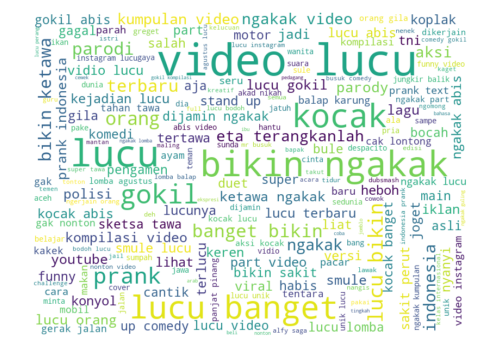

In [61]:
show_wordcloud(bigtext_fun, stop_words)

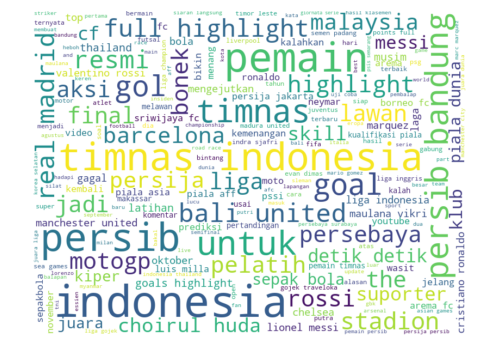

In [62]:
show_wordcloud(bigtext_sport, stop_words)

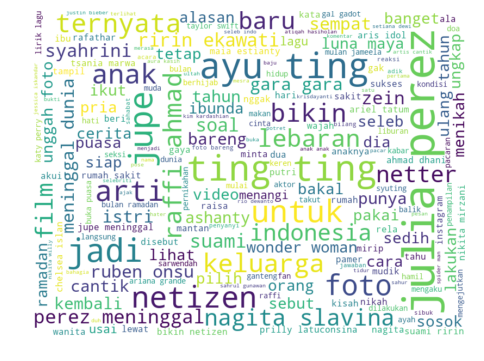

In [63]:
show_wordcloud(bigtext_entertainment, stop_words)

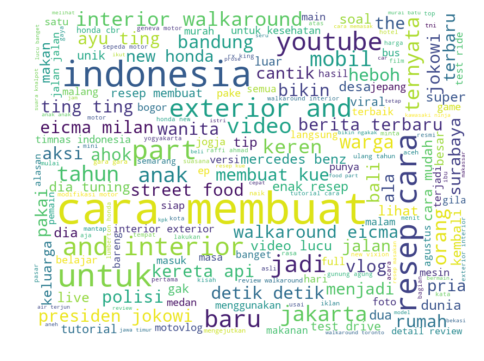

In [64]:
show_wordcloud(bigtext_other, stop_words)

In [0]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn import model_selection, preprocessing, linear_model, naive_bayes, metrics, svm
from sklearn import decomposition, ensemble
from sklearn.model_selection import cross_val_score

In [66]:
# split the dataset into training and validation datasets
train_x, valid_x, train_y, valid_y = model_selection.train_test_split(clean_data['text'], clean_data['label'])
print(len(train_x), len(valid_x))

187593 62532


In [67]:
# create a count vectorizer
count_vect = CountVectorizer(analyzer='word', token_pattern=r'\w{1,}')
count_vect.fit(clean_data['text'])
# transform the training and validation data using count vectorizer
xtrain_count = count_vect.transform(train_x)
xvalid_count = count_vect.transform(valid_x)
print(xtrain_count.shape, xvalid_count.shape)

# word level tf-idf
tfidf_vect = TfidfVectorizer(analyzer='word', token_pattern=r'\w{1,}')
tfidf_vect.fit(clean_data['text'])
xtrain_tfidf = tfidf_vect.transform(train_x)
xvalid_tfidf = tfidf_vect.transform(valid_x)
print(xtrain_tfidf.shape, xvalid_tfidf.shape)

(187593, 94243) (62532, 94243)
(187593, 94243) (62532, 94243)


In [68]:
#train model
logistic_r = linear_model.LogisticRegression()
logistic_r.fit(xtrain_tfidf, train_y)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [69]:
# get the predictions
pred_valid = logistic_r.predict(xvalid_tfidf)
print("Validation set")
print("Accuracy:", metrics.accuracy_score(pred_valid, valid_y))
print("Report:\n", metrics.classification_report(valid_y, pred_valid))

Validation set
Accuracy: 0.9211443740804708
Report:
               precision    recall  f1-score   support

           1       0.75      0.56      0.64      2216
           2       0.36      0.08      0.13      1584
           3       0.85      0.51      0.64      3209
           4       0.93      0.98      0.96     55523

   micro avg       0.92      0.92      0.92     62532
   macro avg       0.72      0.53      0.59     62532
weighted avg       0.91      0.92      0.91     62532



In [70]:
#%%
#transform to tfidf and training by naive bayes
#from sklearn.pipeline import Pipeline
#from sklearn.feature_extraction.text import CountVectorizer
#from sklearn.feature_extraction.text import TfidfTransformer
#from sklearn.naive_bayes import MultinomialNB
#text_clf = Pipeline([('vect', CountVectorizer()),
#                     ('tfidf', TfidfTransformer()),
#                      ('clf', MultinomialNB())])
text_clf.fit(train_x, train_y)

Pipeline(memory=None,
     steps=[('vect', CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), preprocessor=None, stop_words=None,
        strip...inear_tf=False, use_idf=True)), ('clf', MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True))])

In [71]:
# try to predict new text
new_title = ['kevin/marcus juarai all england']
pred = text_clf.predict(new_title)
print("Result {}".format(pred))

Result [4]
